# Lab: Comparing tSNE and UMAP Dimention Reduction Models

In [1]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install matplotlib==3.9.3
!pip install plotly==5.24.1
!pip install --upgrade scikit-learn umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 14.8 MB/s  0:00:01 eta 0:00:01
  Attempting uninstall: plotly
    Found existing installation: plotly 6.5.2
    Uninstalling plotly-6.5.2:
      Successfully uninstalled plotly-6.5.2━━━━━━━━━━━━━━━━━━━ 1/2 [plotly]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]2m1/2 [plotly]
  Using cached scikit_learn-1.7.2-cp310-cp310-macosx_12_0_arm64.whl.metadata (11 kB)
Using cached scikit_learn-1.7.2-cp310-cp310-macosx_12_0_arm64.whl (8.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 26.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.2/37.2 MB 27.6 MB/s  0:00:01m0:00:0100:01
  Attempting uninstall: scikit-learn━━━━━━━━━━━━ 0/5 [llvmlite]
    Found existing installation: scikit-learn 1.6.032m0/5 [llvmlite]
    Uninstalling scikit-learn-1.6.0:━━━━━━━━ 0/5 [llvmlite]
      Successfully uninstalled scikit-learn-1.6.00/5 [llvmlite]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [umap-learn]5 [numba]-learn]


### Import Required Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import umap.umap_ as UMAP
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import plotly.express as px

### Generate synthetic data with four clusters in a 3D

In [4]:
# Cluster centers:
centers = [ [ 2, -6, -6],
            [-1,  9,  4],
            [-8,  7,  2],
            [ 4,  7,  9] ]

# Cluster standard deviations:
cluster_std = [1,1,2,3.5]

# Make the blobs and return the data and the blob labels
X, labels_ = make_blobs(n_samples=500, centers=centers, n_features=3, cluster_std=cluster_std, random_state=42)

### Display the data in an interactive Plotly 3D scatter plot

In [6]:
# Create a Dataframe for plotly
df = pd.DataFrame(X, columns=['X', 'Y', 'Z'])

# Create interactive 3D scatter plot
fig = px.scatter_3d(df, x='X', y='Y', z='Z', color=labels_.astype(str), opacity=0.7, color_discrete_sequence=px.colors.qualitative.G10, title='3D scatter plot of four Blobs')

fig.update_traces(marker=dict(size=5, line=dict(width=1, color='black')), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800) #remove color bar, resize plot

fig.show()

- These blobs have varying densities.
- One blob is distinct from the others.
- The two largest blobs are distinct from each other, but both have a bit of overlap with the other blob between them.

--------------------------------
### Standardize the data to preprare for three projection methods

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Apply t-SNE to reduce the dimentionality to 2D

In [10]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

In [11]:
X_tsne[:5]

array([[  5.685679  ,  18.253464  ],
       [  0.16700317, -20.21174   ],
       [ 10.492974  ,  18.89219   ],
       [  5.7434573 , -24.55606   ],
       [ 11.43868   ,  -2.841995  ]], dtype=float32)

### Plot the 2D t-SNE result

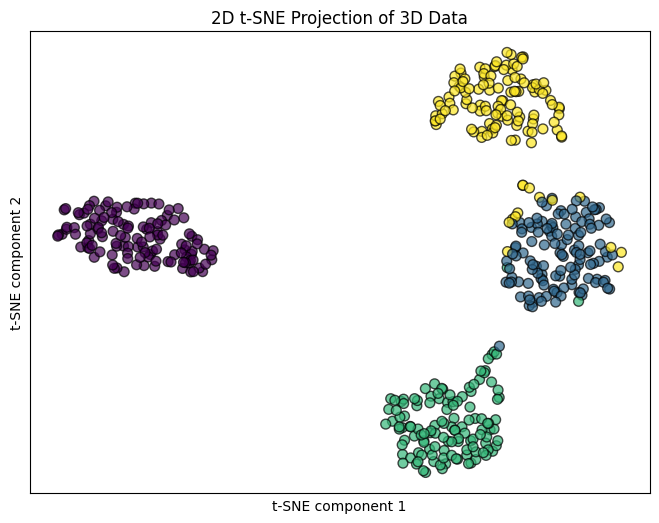

In [12]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(X_tsne[:,0], X_tsne[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
ax.set_title("2D t-SNE Projection of 3D Data")
ax.set_xlabel("t-SNE component 1")
ax.set_ylabel("t-SNE component 2")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

- t-SNE projected the data into four distince clusters, although the original data had some overlap between a few clusters.
- Some of the points ended up in the "wrong" cluster; t-SNE has no knowledge of which clusters the points originally belong to.
- All the clusters have similar densities.
- Two of the blobs are distinct from each other but "gave up" some of their points to the blob they originally had overlapped with.
- A "perfect" result would not completely separate the overlap between blobs.
- The distance between the blobs is consistent with the degree to which they were originally separated.

---------------------------------------
### Compare UMAP and PCA dimentionality reduction to two dimensions

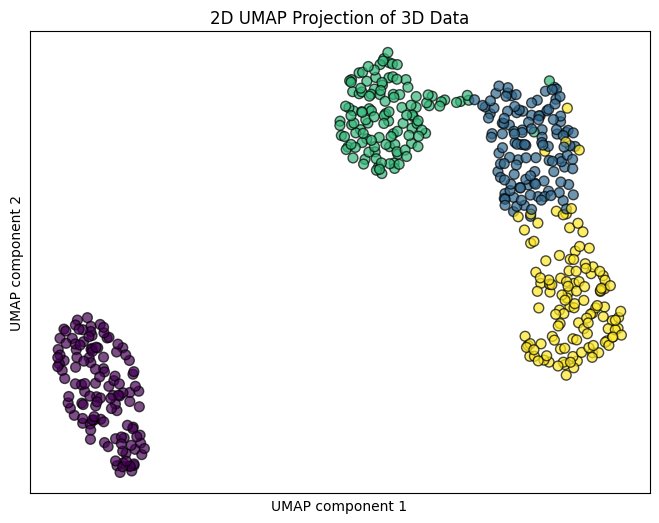

In [16]:
# Apply UMAP to reduce the dimentionality to 2D
umap_model = UMAP.UMAP(n_components=2, random_state=42, min_dist=0.5, spread=1, n_jobs=1)
X_umap = umap_model.fit_transform(X_scaled)

# Plot the 2D UMAP result
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(X_umap[:,0], X_umap[:,1], c=labels_, cmap='viridis', s=50, alpha=0.7, edgecolor='k')

ax.set_title("2D UMAP Projection of 3D Data")
ax.set_xlabel("UMAP component 1",)
ax.set_ylabel("UMAP component 2",)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

- UMAP correctly projecte the data into four partially distinct clusters, with one cluster completely distinct from others.
- Unlike t_SNE, it has preserved the connectness that the original data had with the partially overlapping clusters.
- Like t-SNE,  some of the points ended up in "wrong" cluster.
- Like t-SNE, all the clusters have similar densities.
- A "perfect" result would not completely separate the overlaps between the blobs, because they actually do overlap in the original feature space.
- The distance between the clusters is consistant with the degree to which they were originally separated.


### Apply PCA to reduce the dimentionality to 2D

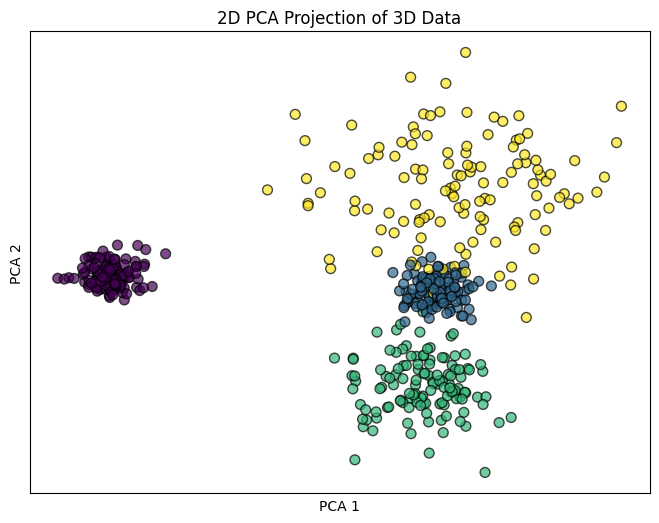

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(8, 6))
ax2 = fig.add_subplot(111)
scatter2 = ax2.scatter(X_pca[:,0], X_pca[:,1], c=labels_, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
ax2.set_title("2D PCA Projection of 3D Data")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2")
ax2.set_xticks([])
ax2.set_yticks([])
plt.show()

- PCA faithfully preserved the relative blob densities.
- PCA also preserved the relative separation between blobs.
- The distance between the clusters is very consistent with the degree to which they were originally separated.
- PCA and t-SNE took very little time to complete compared to UMAP.
- IMNSHO, PCA outperformed both t-SNE and UMAP in this expiriment. This point to a common tendency to want to implement more advanced algorithms. The default result is not always an improvement over the simpler established methods.
